# Introduction

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [1]:
import tensorflow as tf


# tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


# The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [3]:
y_train.shape

(60000,)

In [4]:
y_test.shape

(10000,)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

### Plot an Image Example

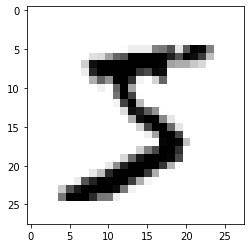

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = "binary")
plt.show()

### Display Labels

In [8]:
y_train[0]

5

# One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [10]:
y_test_encoded.shape

(10000, 10)

### Display Encoded Labels

# Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

#  Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [11]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000,784))
x_train.shape

(60000, 28, 28)

### Display Pixel Values

In [12]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [13]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
x_train_norm = (x_train_reshaped - x_mean) / (x_std + 1e-10)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + 1e-10)

### Display Normalized Pixel Values

In [14]:
x_test_norm[0]

array([-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42

# Creating a Model
### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [16]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

### Training the Model

In [17]:
history = model.fit(x_train_norm, y_train_encoded, epochs = 10, validation_data = (x_test_norm, y_test_encoded))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3738 - accuracy: 0.8924 - val_loss: 0.2137 - val_accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1835 - accuracy: 0.9463 - val_loss: 0.1562 - val_accuracy: 0.9527
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1389 - accuracy: 0.9586 - val_loss: 0.1304 - val_accuracy: 0.9607
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1127 - accuracy: 0.9666 - val_loss: 0.1162 - val_accuracy: 0.9632
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0950 - accuracy: 0.9713 - val_loss: 0.1019 - val_accuracy: 0.9674
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.1056 - val_accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.1014 - val_accuracy:

### Evaluating the Model

In [18]:
loss, accuray = model.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9722


# Predictions

### Predictions on Validation Set

In [19]:
preds = model.predict(x_test_norm)
preds.shape

(10000, 10)

### Plotting the Results

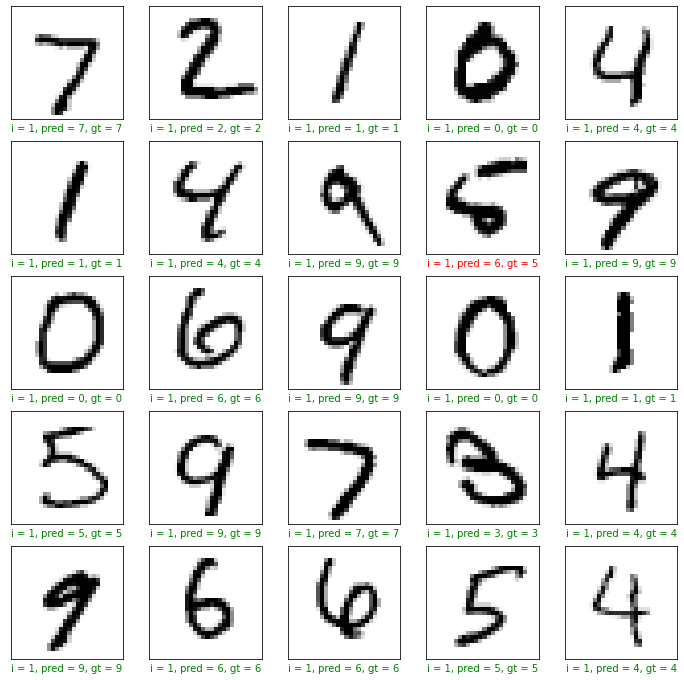

In [20]:
plt.figure(figsize = (12,12))
start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + i])
    gt = y_test[start_index + i]
    col = 'g'
    if pred != gt:
        col = "r"
    plt.xlabel("i = {}, pred = {}, gt = {}".format(start_index + 1, pred, gt), color = col)
    plt.imshow(x_test[start_index + i], cmap = 'binary')
plt.show()

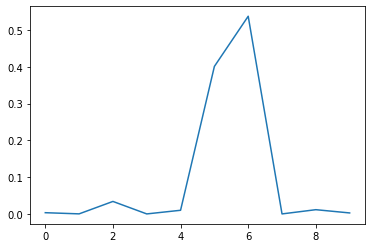

In [21]:
plt.plot(preds[8])

## Predicting on Kaggle Dataset

In [22]:
import pandas as pd
c = np.array(pd.read_csv("test.csv"))
c = (c - x_mean) / (x_std + 1e-10)

In [23]:
res = pd.DataFrame()
res["ImageId"] = range(1, 28001)
res["Label"] = [np.argmax(i) for i in model.predict(c)]
res.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [24]:
res.set_index("ImageId").to_csv("res.csv")